In [1]:
# Employee Sentiment Analysis – Final LLM Assessment


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from sklearn.linear_model import LinearRegression

plt.style.use("seaborn-v0_8")
sns.set(rc={"figure.figsize": (10, 5)})

# Load data (CSV)
df = pd.read_csv(r"C:\Users\Admin\Desktop\Employee-sentiment-project\Data\emails.csv.csv")   # change path if needed
df.head()


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [5]:
# Combine subject and body into one text field

df["text"] = (df["Subject"].fillna("") + " " + df["body"].fillna("")).str.strip()

# Parse date column
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with no text or no date
df = df.dropna(subset=["text", "date"])

df.head()


,Subject,body,date,from,text
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,EnronOptions Update! EnronOptions Announcement...
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,"(No Subject) Marc,\n\nUnfortunately, today is ..."
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Phone Screen Interview - Shannon L. Burnham W...
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,RE: My new work email we were thinking papasit...
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Bet Since you never gave me the $20 for the la...


In [6]:
## 2. Exploratory Data Analysis (EDA)


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Subject  2191 non-null   object        
 1   body     2191 non-null   object        
 2   date     2191 non-null   datetime64[ns]
 3   from     2191 non-null   object        
 4   text     2191 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 85.7+ KB


In [7]:
df.describe(include="all")


,Subject,body,date,from,text
count,2191,2191,2191,2191,2191
unique,1251,1539,NaN,10,1563
top,(No Subject),\n\n,NaN,lydia.delgado@enron.com,TradersNews: Confirmation Request when possibl...
freq,141,21,NaN,284,6
mean,NaN,NaN,2010-12-31 02:17:21.716111360,NaN,NaN
min,NaN,NaN,2010-01-01 00:00:00,NaN,NaN
25%,NaN,NaN,2010-06-30 12:00:00,NaN,NaN
50%,NaN,NaN,2011-01-01 00:00:00,NaN,NaN
75%,NaN,NaN,2011-06-30 12:00:00,NaN,NaN
max,NaN,NaN,2011-12-31 00:00:00,NaN,NaN


In [8]:
df.isnull().sum()


Subject    0
body       0
date       0
from       0
text       0
dtype: int64

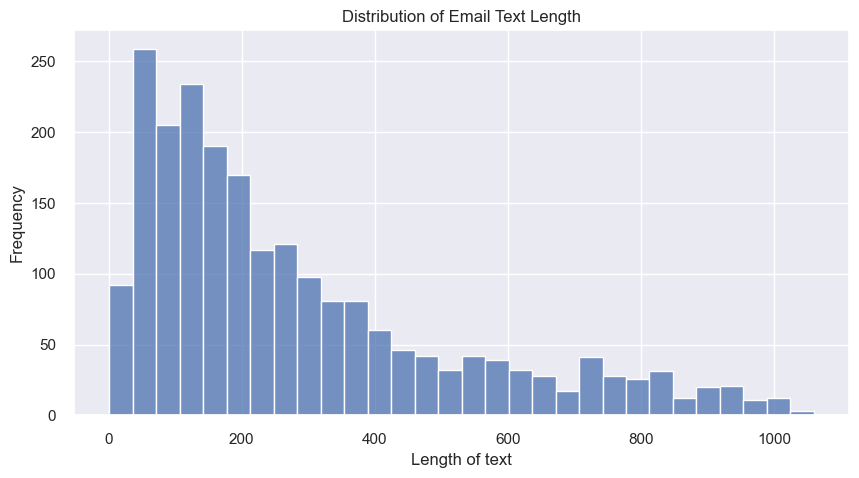

In [9]:
df["text_length"] = df["text"].str.len()

sns.histplot(df["text_length"], bins=30)
plt.title("Distribution of Email Text Length")
plt.xlabel("Length of text")
plt.ylabel("Frequency")
plt.show()


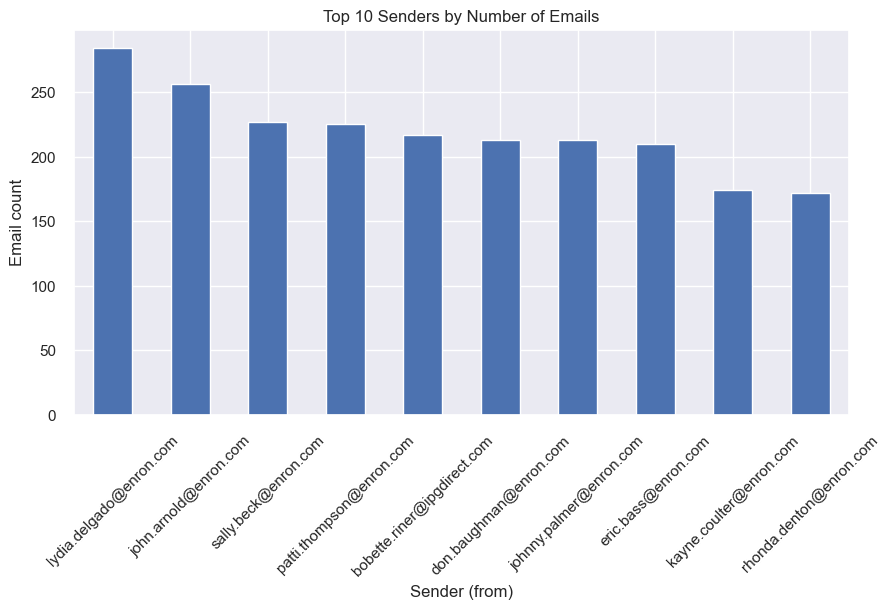

In [10]:
df["from"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Senders by Number of Emails")
plt.xlabel("Sender (from)")
plt.ylabel("Email count")
plt.xticks(rotation=45)
plt.show()


In [13]:
## 3. Sentiment Analysis with TextBlob

def get_sentiment_polarity(text):
    if pd.isna(text) or not str(text).strip():
        return 0.0
    return TextBlob(str(text)).sentiment.polarity

df["sentiment_polarity"] = df["text"].apply(get_sentiment_polarity)

def polarity_to_label(p):
    if p > 0.1:
        return "Positive"
    elif p < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["sentiment_polarity"].apply(polarity_to_label)

df[["text", "sentiment_polarity", "sentiment_label"]].head()


,text,sentiment_polarity,sentiment_label
0,EnronOptions Update! EnronOptions Announcement...,0.250000,Positive
1,"(No Subject) Marc,\n\nUnfortunately, today is ...",-0.043333,Neutral
2,Phone Screen Interview - Shannon L. Burnham W...,0.000000,Neutral
3,RE: My new work email we were thinking papasit...,-0.006818,Neutral
4,Bet Since you never gave me the $20 for the la...,-0.050000,Neutral


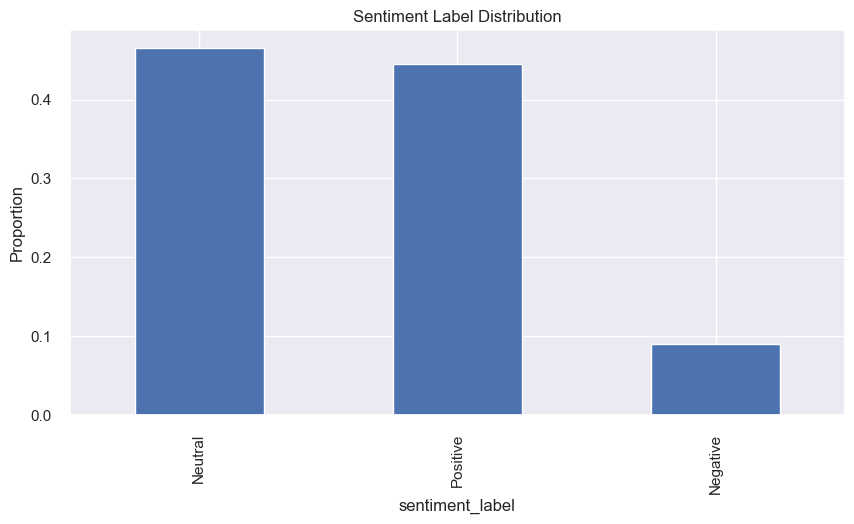

In [14]:
df["sentiment_label"].value_counts(normalize=True).plot(kind="bar")
plt.title("Sentiment Label Distribution")
plt.ylabel("Proportion")
plt.show()


In [15]:
## 4. Monthly Sentiment Scoring


df["year_month"] = df["date"].dt.to_period("M")

score_map = {"Positive": 1, "Neutral": 0, "Negative": -1}
df["sentiment_score"] = df["sentiment_label"].map(score_map)

monthly_scores = (
    df.groupby("year_month")["sentiment_score"]
      .mean()
      .reset_index()
)

monthly_scores["year_month"] = monthly_scores["year_month"].astype(str)
monthly_scores.head()


,year_month,sentiment_score
0,2010-01,0.329670
1,2010-02,0.373626
2,2010-03,0.318681
3,2010-04,0.304348
4,2010-05,0.406593


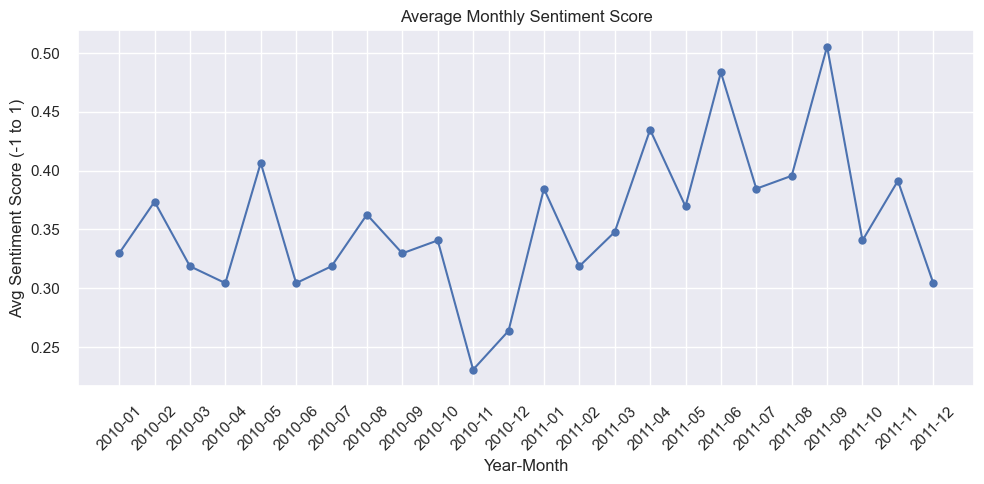

In [16]:
plt.plot(monthly_scores["year_month"], monthly_scores["sentiment_score"], marker="o")
plt.xticks(rotation=45)
plt.title("Average Monthly Sentiment Score")
plt.xlabel("Year-Month")
plt.ylabel("Avg Sentiment Score (-1 to 1)")
plt.tight_layout()
plt.show()


In [17]:
## 5. Employee Ranking (by Sender)


sender_sentiment = (
    df.groupby("from")["sentiment_score"]
      .mean()
      .sort_values(ascending=False)
)

top_positive = sender_sentiment.head(10)
top_negative = sender_sentiment.tail(10)

print("Top 10 most positive senders:")
display(top_positive)

print("\nTop 10 most negative senders:")
display(top_negative)


Top 10 most positive senders:


from
sally.beck@enron.com           0.392070
eric.bass@enron.com            0.380952
john.arnold@enron.com          0.378906
johnny.palmer@enron.com        0.375587
lydia.delgado@enron.com        0.355634
kayne.coulter@enron.com        0.350575
patti.thompson@enron.com       0.346667
don.baughman@enron.com         0.338028
bobette.riner@ipgdirect.com    0.331797
rhonda.denton@enron.com        0.290698
Name: sentiment_score, dtype: float64


Top 10 most negative senders:


from
sally.beck@enron.com           0.392070
eric.bass@enron.com            0.380952
john.arnold@enron.com          0.378906
johnny.palmer@enron.com        0.375587
lydia.delgado@enron.com        0.355634
kayne.coulter@enron.com        0.350575
patti.thompson@enron.com       0.346667
don.baughman@enron.com         0.338028
bobette.riner@ipgdirect.com    0.331797
rhonda.denton@enron.com        0.290698
Name: sentiment_score, dtype: float64

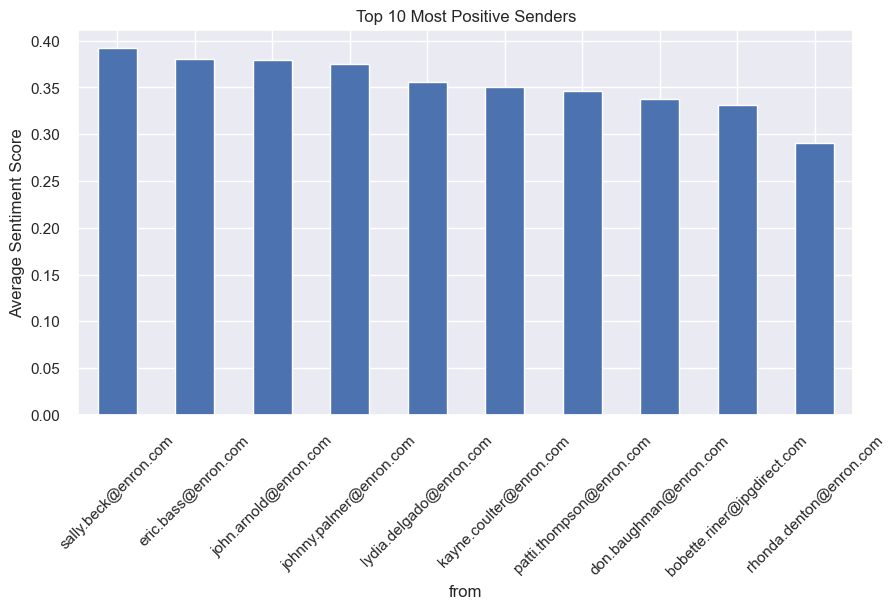

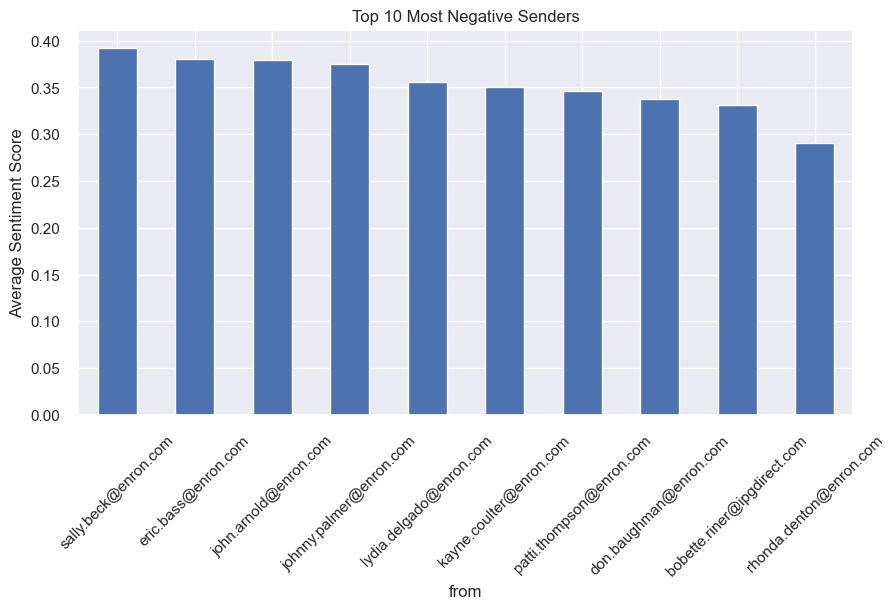

In [18]:
top_positive.plot(kind="bar")
plt.title("Top 10 Most Positive Senders")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.show()

top_negative.plot(kind="bar")
plt.title("Top 10 Most Negative Senders")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.show()


In [19]:
## 6. Flight Risk Identification


sender_stats = df.groupby("from").agg(
    avg_score=("sentiment_score", "mean"),
    negative_share=("sentiment_label", lambda x: (x == "Negative").mean()),
    email_count=("text", "count")
)

# Simple rule: low average score, many negative emails, enough volume
sender_stats["flight_risk"] = (
    (sender_stats["avg_score"] < 0) &
    (sender_stats["negative_share"] > 0.5) &
    (sender_stats["email_count"] >= 5)
)

flight_risk_senders = sender_stats[sender_stats["flight_risk"]]
flight_risk_senders.head()


,avg_score,negative_share,email_count,flight_risk
from,,,,


In [20]:
## 7. Linear Regression – Sentiment Trend Over Time


df_sorted = df.sort_values("date").copy()
df_sorted["t_days"] = (df_sorted["date"] - df_sorted["date"].min()).dt.days

X = df_sorted[["t_days"]]
y = df_sorted["sentiment_score"]

linreg = LinearRegression()
linreg.fit(X, y)

print("Slope:", linreg.coef_[0])
print("Intercept:", linreg.intercept_)



Slope: 0.00010674979071603852
Intercept: 0.31713471894236533


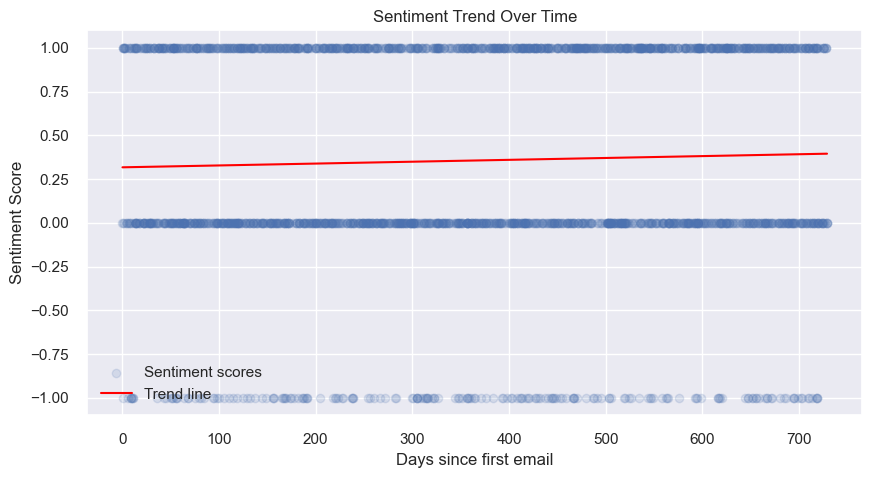

In [21]:
plt.scatter(df_sorted["t_days"], y, alpha=0.15, label="Sentiment scores")
plt.plot(df_sorted["t_days"], linreg.predict(X), color="red", label="Trend line")
plt.title("Sentiment Trend Over Time")
plt.xlabel("Days since first email")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()


In [ ]:
Slope > 0 → overall sentiment improving.

Slope < 0 → sentiment declining.

In [22]:
df.to_csv("../data/processed_emails_with_sentiment.csv", index=False)
